# Distance plots

Notebook to create plots that show the distance as well as the invocation of the base controller over time.

In [20]:
import pathlib

baseDir = pathlib.Path().resolve()
infilename = str(baseDir) + "/../cmake-build-release/bin/minimal_distances.txt"

def preprocessData():
    data = []
    with open(infilename) as file:
        data = [{'it': int(line.split(',')[0]), 'dist':float(line.split(',')[3]), 'adv':bool(int(line.split(',')[4])), 'training':bool(int(line.split(',')[5]))} for line in file.readlines() if '#' not in line]
    return data

data = preprocessData()
#print(str(data))

In [21]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

def plot(data):
    fig, ax = plt.subplots()
    
    #ax.hlines(y_limits[var][0], xmin=0, xmax=1000, linewidth=0.1)
    #ax.hlines(y_limits[var][1], xmin=0, xmax=1000, linewidth=0.1)
    use_basecontroller = [ y['adv'] == False for y in data]
    use_advancedcontroller = [ y['adv'] == True for y in data]
    distances = [ y['dist'] for y in data]
    x = [y['it'] for y in data]
    ax.fill_between(x, distances, where=use_basecontroller, color="orange", alpha=0.3)
    ax.fill_between(x, distances, where=use_advancedcontroller, color="green", alpha=0.3)
    
    ax.set_xlabel('time (control cycles)')
    ax.set_ylabel('distance to track boundary')
    
    plt.savefig('distances.png', dpi=600)
    plt.show()

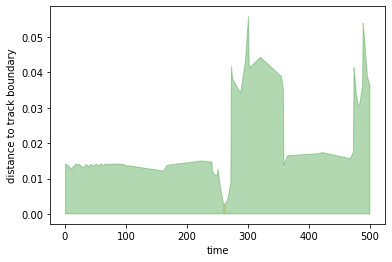

In [22]:
preprocessData()
plot(data)